In [1]:
from pyvista import OpenFOAMReader
import pyvista as pv
import numpy as np
import matplotlib.pyplot as plt
from pyvista import StructuredGrid


B_BOX = [-500, 500, 1e-2, 500, -500, 500]

GRID_SIZE = 3.9

In [2]:
# file_path = "/home/ubuntu/openfoam/OpenFOAM/openfoam-v2212/run/testCase/open.foam"
# file_path = "/home/ubuntu/openfoam/OpenFOAM/openfoam-v2212/run/refCaseSolved3/open.foam"
file_path = "/Users/chanwooahn/openfoam/OpenFOAM/openfoam-2212/run/refCaseSolved3/open.foam"


reader = OpenFOAMReader(file_path)

In [3]:
print(f"All patch names: {reader.patch_array_names}")
print(f"All patch status: {reader.all_patch_arrays_status}")

All patch names: ['internalMesh', 'patch/inlet', 'patch/outlet', 'patch/ground', 'patch/object', 'patch/fixedWalls']
All patch status: {'internalMesh': True, 'patch/inlet': True, 'patch/outlet': True, 'patch/ground': True, 'patch/object': True, 'patch/fixedWalls': True}


In [4]:
print(f"Available Time Values: {reader.time_values}")
reader.set_active_time_value(reader.time_values[-1])
mesh = reader.read()
print(f"Mesh patches: {mesh.keys()}")

Available Time Values: [0.0, 41.0]
Mesh patches: ['internalMesh', 'boundary']


In [5]:
internal_mesh = mesh["internalMesh"] 
print(type(internal_mesh))
print(internal_mesh)

<class 'pyvista.core.pointset.UnstructuredGrid'>
UnstructuredGrid (0x107f6dc00)
  N Cells:    1287059
  N Points:   1461370
  X Bounds:   -5.000e+02, 5.000e+02
  Y Bounds:   -4.211e-01, 5.000e+02
  Z Bounds:   -5.000e+02, 5.000e+02
  N Arrays:   10


In [6]:
print(internal_mesh.cell_data)
print(internal_mesh.point_data)

pyvista DataSetAttributes
Association     : CELL
Active Scalars  : p
Active Vectors  : U
Active Texture  : None
Active Normals  : None
Contains arrays :
    U                       float32    (1287059, 3)         VECTORS
    epsilon                 float32    (1287059,)
    k                       float32    (1287059,)
    nut                     float32    (1287059,)
    p                       float32    (1287059,)           SCALARS
pyvista DataSetAttributes
Association     : POINT
Active Scalars  : p
Active Vectors  : U
Active Texture  : None
Active Normals  : None
Contains arrays :
    U                       float32    (1461370, 3)         VECTORS
    epsilon                 float32    (1461370,)
    k                       float32    (1461370,)
    nut                     float32    (1461370,)
    p                       float32    (1461370,)           SCALARS


In [7]:
# pl = pv.Plotter()

# pl.enable_ssao(radius=0.01)
# pl.add_mesh(
#     internal_mesh, scalars='p', smooth_shading=True, split_sharp_edges=True, ambient=0.2
# )
# pl.enable_anti_aliasing('fxaa')  # also try 'ssaa'
# pl.show()

In [8]:
from openfoam.post import spatial_sample_case_even


sampled, g_size = spatial_sample_case_even(file_path, B_BOX, GRID_SIZE)
sampled

StructuredGrid (0x2c066eb60)
  N Cells:      8258175
  N Points:     8388608
  X Bounds:     -4.972e+02, 4.972e+02
  Y Bounds:     1.950e+00, 4.972e+02
  Z Bounds:     -4.972e+02, 4.972e+02
  Dimensions:   256, 128, 256
  N Arrays:     5

In [9]:
# pl = pv.Plotter()

# pl.enable_ssao(radius=0.01)
# pl.add_mesh(
#     sampled, scalars='p', smooth_shading=True, split_sharp_edges=True, ambient=0.2
# )
# pl.enable_anti_aliasing('fxaa')  # also try 'ssaa'
# pl.show()

In [10]:
p = sampled["p"]
print(p.shape)
p[:50]

(8388608,)


pyvista_ndarray([39.595314, 39.595314, 39.595314, 39.498962, 39.498962,
                 39.498962, 39.498962, 39.498962, 39.18682 , 39.18682 ,
                 39.18682 , 39.18682 , 39.18682 , 39.18682 , 39.18682 ,
                 39.18682 , 39.18682 , 38.47505 , 38.47505 , 38.47505 ,
                 38.47505 , 38.47505 , 38.47505 , 38.47505 , 38.47505 ,
                 38.47505 , 38.47505 , 38.47505 , 38.47505 , 37.175888,
                 37.175888, 37.175888, 37.175888, 37.175888, 37.175888,
                 37.175888, 37.175888, 37.175888, 37.175888, 37.175888,
                 37.175888, 37.175888, 35.28902 , 35.28902 , 35.28902 ,
                 35.28902 , 35.28902 , 35.28902 , 35.28902 , 35.28902 ],
                dtype=float32)

In [11]:
k = sampled["k"]
k_r = k.reshape((256, 128, 256, 1))
k_ = np.transpose(k_r)
k_.shape

(1, 256, 128, 256)

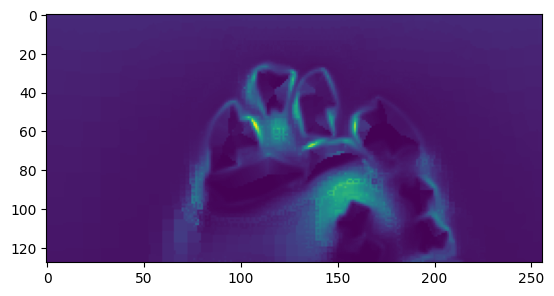

In [12]:
p_slice = k_[0, :128, 0, :]
plt.imshow(p_slice)

(1, 256, 128, 256)


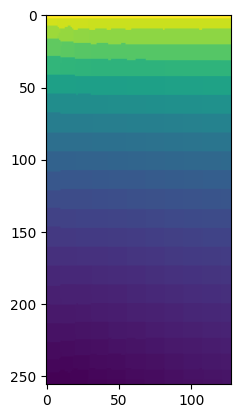

In [13]:


from typing import Tuple


k = sampled["k"]
k_r = k.reshape((256, 128, 256, 1))
k_ = np.transpose(k_r)
print(k_.shape)

p_slice = k_[0, :, -1, :128]
plt.imshow(p_slice)







In [14]:
grid_shape = [256, 128, 256]

u = sampled["U"]
p = sampled["p"]
k = sampled["k"]

fs = [u, p, k]

reshaped = map(lambda f: f.reshape((grid_shape[0], grid_shape[1], grid_shape[2], -1)), fs)

transposed = map(lambda f: np.transpose(f), reshaped)

res = np.concatenate(list(transposed), axis=0)



In [15]:
def reshape_sampled(sampled: StructuredGrid, grid_shape: Tuple[float, float, float]) -> np.array:
    u = sampled["U"]
    p = sampled["p"]
    k = sampled["k"]

    fs = [u, p, k]

    reshaped = map(lambda f: f.reshape((grid_shape[0], grid_shape[1], grid_shape[2], -1)), fs)

    transposed = map(lambda f: np.transpose(f), reshaped)

    res = np.concatenate(list(transposed), axis=0)

    return res

In [19]:
from openfoam.mesh import BoundingBox




res = post_process(file_path, B_BOX, GRID_SIZE)
res.shape

(5, 256, 128, 256)

In [17]:

from openfoam.post import grid_from_bbox_even


g = grid_from_bbox_even(B_BOX, GRID_SIZE)
g.dimensions

(256, 128, 256)